### Data Loading

In [1]:
import pandas as pd

# Read the file with automatic separator detection
data = pd.read_csv('HD_Complete_Data.csv', sep = ';')

# Separate the target variable (Y) from the predictors (X)
Y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'])

# I Explorative Analysis of the dataset

### Exploration of target variable Y

Descriptive statistics of Y:
count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

Missing values in Y:
0



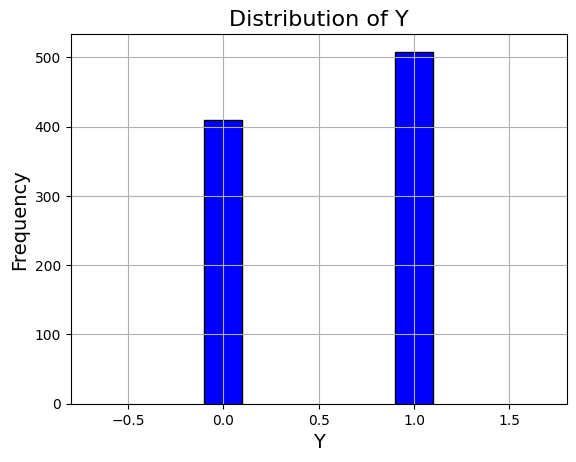

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display descriptive statistics of the target variable (Y) to summarize its distribution.
print("Descriptive statistics of Y:")
print(Y.describe())
print()

# Check for missing values in the target variable to ensure data completeness.
print("Missing values in Y:")
print(Y.isnull().sum())
print()

# Plot the distribution of the target variable (Y) to visualize its overall shape and spread.
bin_edges = np.linspace(Y.min() - 0.5, Y.max() + 0.5, num=3)  # Adjust bin edges for better centering
# Adjust the histogram for centered bars

# Add some padding to the plot
plt.xlim(bin_edges[0] - 0.3, bin_edges[-1] + 0.3)
plt.bar(bin_edges[:-1] + 0.5, np.histogram(Y, bins=bin_edges)[0], width=0.2, align='center', color="blue", edgecolor="black")
plt.title("Distribution of Y", fontsize=16)
plt.xlabel("Y", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()



### Exploration of pradictors X

In [3]:
# Display the first few rows of the predictors DataFrame to inspect the column names and get an overview of the data
X.head()

# Display basic dataset information to get a general overview
print(f"Predictors dimensions (X): {X.shape}")

# Check for missing values
print(f"Total missing values in X: {X.isnull().sum().sum()}\n")

# Display essential statistics for each feature
print("Key statistics for each predictor:")
print(X.describe().T, "\n")

# Outlier detection using the Interquartile Range (IQR) method
def detect_outliers_summary(data, threshold=1.5):
    Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
    IQR = Q3 - Q1
    bounds = (Q1 - threshold * IQR, Q3 + threshold * IQR)
    mask = (data < bounds[0]) | (data > bounds[1])
    return mask.sum()[mask.sum() > 0], mask.any(axis=1).sum()

outliers_X, total_points_with_outliers = detect_outliers_summary(X, threshold=1.7)
print(f"Total rows with at least one outlier: {total_points_with_outliers}/{X.shape[0]}")

if not outliers_X.empty:
    sns.barplot(x=outliers_X.index, y=outliers_X.values, palette="viridis")
    plt.title("Outliers per Variable (IQR Threshold = 1.7)", fontsize=14)
    plt.xlabel("Variable"), plt.ylabel("Outliers"), plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7), plt.tight_layout(), plt.show()
else:
    print("No outliers detected in any variable.")

# Plot boxplots for feature distributions
chunk_size = 35
for i in range(0, X.shape[1], chunk_size):
    subset = X.iloc[:, i:i + chunk_size]
    sns.boxplot(data=subset, orient='h', palette="Set2", showfliers=True)
    plt.title(f"Boxplots of Predictors (Features {i + 1} to {min(i + chunk_size, X.shape[1])})", fontsize=14)
    plt.xlabel("Values"), plt.grid(True, linestyle="--", alpha=0.6), plt.yticks(fontsize=10)
    plt.tight_layout(), plt.show()



Predictors dimensions (X): (918, 11)
Total missing values in X: 0

Key statistics for each predictor:
             count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2 



TypeError: unsupported operand type(s) for -: 'str' and 'str'